###  Delivery_time -> Predict delivery time using sorting time 
#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python

In [47]:
# importing imp library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [48]:
df=pd.read_csv('delivery_time.csv')

In [49]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [50]:
# EDA

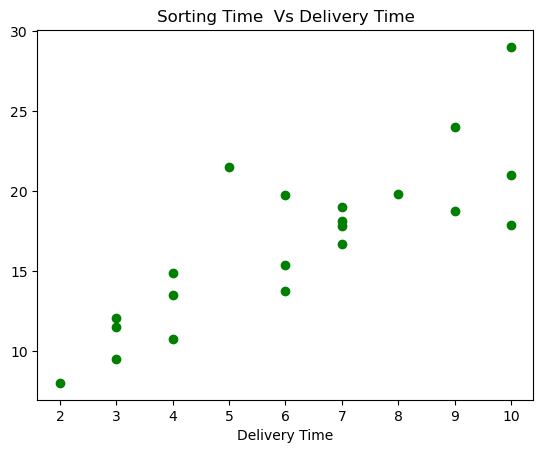

In [51]:
# plotting scatter plot
plt.scatter(df['Sorting Time'],df['Delivery Time'],color='green')
plt.xlabel('Sorting Time')
plt.xlabel('Delivery Time')
plt.title('Sorting Time  Vs Delivery Time')
plt.show()

In [52]:
# checking for null values
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [53]:
df.shape

(21, 2)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [55]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [56]:
# finding correlation between target and feature
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


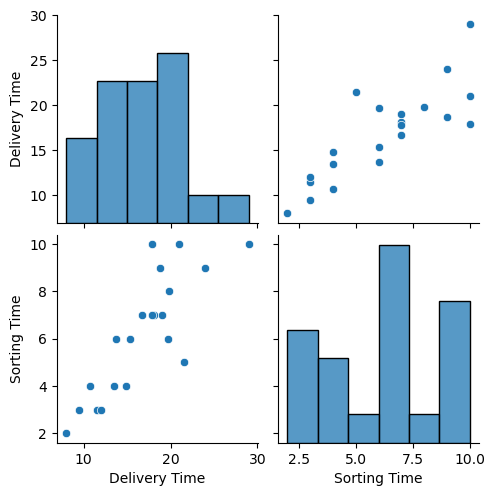

In [57]:
sns.pairplot(df)

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


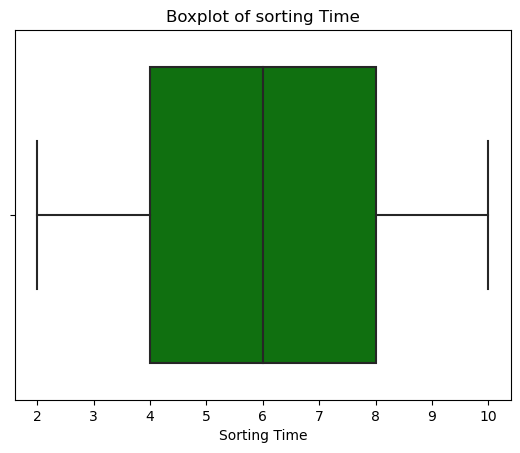

In [58]:
#boxplot of sorting time
sns.boxplot(df['Sorting Time'],color='green')
plt.title('Boxplot of sorting Time')
plt.show()

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Delivery Time')

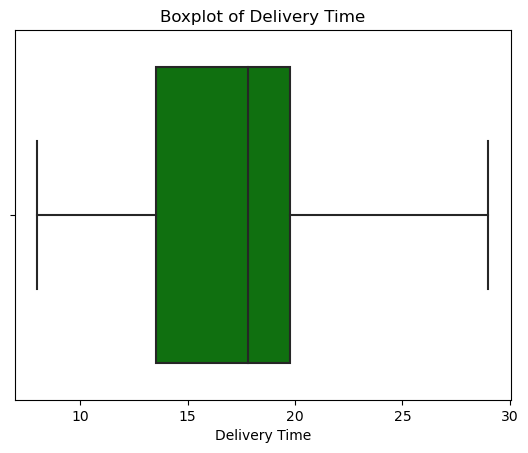

In [59]:
#boxplot of delivery time
sns.boxplot(df['Delivery Time'],color='green')
plt.title('Boxplot of Delivery Time')

C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

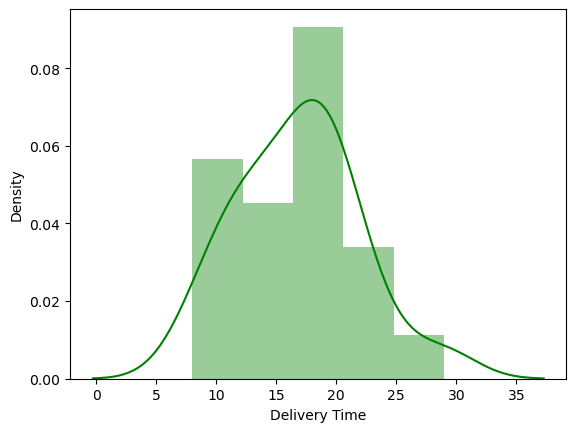

In [60]:
sns.distplot(df['Delivery Time'],color='green')

C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

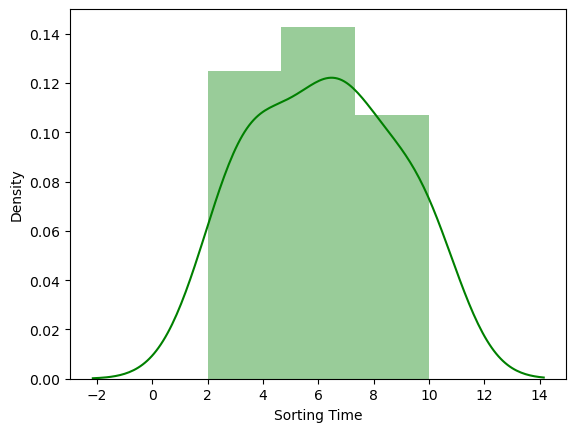

In [61]:
sns.distplot(df['Sorting Time'],color='green')

In [62]:
# spliting in to target and feature
x=pd.DataFrame(df['Sorting Time'])
y=pd.DataFrame(df['Delivery Time'])

In [63]:
# splitting data in to train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 1)
(5, 1)
(16, 1)
(5, 1)


In [65]:
# Train the algorithm
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [66]:
# Rerive the intercept
b=lr.intercept_
b

array([6.41583967])

In [67]:
# Retrieve the slope
m=lr.coef_
m

array([[1.65695232]])

In [68]:
# Predicted Value
y_pred=lr.predict(X_test)
y_pred
pd.DataFrame(data=y_pred,columns=['predicted value of Delivery Time'])

,predicted value of Delivery Time
0,19.671458
1,18.014506
2,22.985363
3,11.386697
4,21.328411


In [69]:
#Actual value of Delivery Time
y_test

,Delivery Time
10,19.83
6,19.00
0,21.00
14,12.03
3,24.00


In [173]:
# Evaluate the alogorithm
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Eroor:',metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 15.785203817963389
Mean Squared Eroor: 266.07402684450665
Mean Absolute Error: 16.311775710955157


In [71]:
r2 = r2_score(y_test, y_pred)
print('R-squared score :', r2)

R-squared score : 0.8401314793938008


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

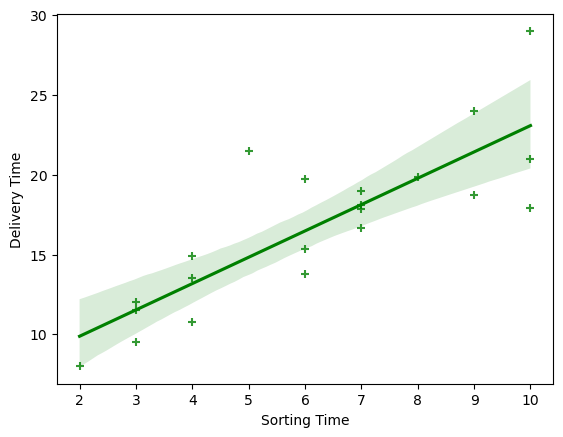

In [72]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'],color='Green',marker='+')

In [73]:
# predicting For individual value for Delivery Time
# y = mx + b

In [74]:
y=m * 7 + b
y

array([[18.01450587]])

###  1) applying logarithmic transformation

In [75]:
# Separate the independent and dependent variables
x = pd.DataFrame(np.log(df['Sorting Time']))
y = pd.DataFrame(df['Delivery Time'])


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

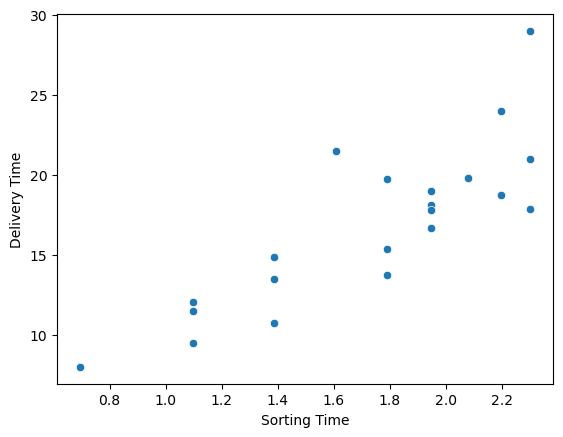

In [87]:
sns.scatterplot(data=df,x=np.log(df['Sorting Time']),y=df['Delivery Time'])

In [76]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [77]:
# Fit a linear regression model on the training data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [78]:
# Predict the dependent variable using the model on the testing data
y_pred = model.predict(x_test)
y_pred

array([[19.72020866],
       [18.5305583 ],
       [21.70822663],
       [10.98185989],
       [20.76955465]])

In [79]:
# Compute the R-squared score on the testing data
r2 = r2_score(y_test, y_pred)
print('R-squared score :', r2)

R-squared score : 0.8429583436413207


###  2) Applying squareroot Transformationm

In [141]:
# taking a dependent and independent variable
x = pd.DataFrame(df['Sorting Time'])
y = pd.DataFrame(np.sqrt(df['Delivery Time']))


In [142]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [143]:
# Fit a linear regression model on the training data
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [144]:
# Predict the dependent variable using the model on the testing data
y_pred = model1.predict(x_test)


In [145]:
# Compute the R-squared score on the testing data
r2 = r2_score(y_test,y_pred )
print('R-squared score :', r2)

R-squared score : 0.8489174177510332


In [146]:
# # Compute the R-squared score on the testing data
# r2 = r2_score(np.power(y_test,2) ,np.power(y_pred,2))
# print('R-squared score :', r2)

###  3) reciprocal transformation

In [147]:
# taking a dependent and independent variable
x = pd.DataFrame(df['Sorting Time'])
y = pd.DataFrame(1/df['Delivery Time'])


In [148]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [149]:
# Fit a linear regression model on the training data
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [150]:
# Predict the dependent variable using the model on the testing data
y_pred = model2.predict(x_test)

In [164]:
# Compute the R-squared score on the testing data
r2 = r2_score(y_test,y_pred )
print('R-squared score :', r2)

R-squared score : 0.7796393441408829


###  4) Exponential Traasnformationm

In [165]:
# taking a dependent and independent variable
x = pd.DataFrame(df['Sorting Time'])
y = pd.DataFrame(df['Delivery Time'])

In [166]:
#  Apply exponential transformation to the dependent variable
y_transformed=np.log(y)

In [168]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_transformed, test_size=0.2, random_state=2)

In [169]:
# Fit a linear regression model on the transformed training data
model3 = LinearRegression()
model3.fit(x_train, y_train)

LinearRegression()

In [170]:
# Predict the transformed dependent variable using the model on the testing data
y_pred_transformed = model3.predict(x_test)

In [171]:
# Inverse transform the predicted dependent variable back to the original scale
y_pred = np.exp(y_pred_transformed)

In [178]:
# Calculate the R-squared score for the model on the testing data
r2 = r2_score(y_test, y_pred_transformed)
print('R-squared score:', r2)
# print('Mean squared error:', mse)

R-squared score: 0.8460638458734753
